In [1]:
# Written by Mara Fennema
# Code inspired by https://www.kaggle.com/ahmethamzaemra/mlpclassifier-example
# 
# This notebook classifies a dataset of files on their focus. 
# It does so based on the cell of the hidden layer of the LSTM
# used for predicting pitch. 
# It randomly creates the train and testset. 

In [ ]:
import numpy as np 
import pandas as pd 

from subprocess import check_output
import ast
path = "PATH-TO-LABELED-HIDDEN-LAYERS"

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Unnamed: 0,hidden,class
0,0,"[[[1.068283200263977], [1.0058785676956177], [...",1
1,1,"[[[-0.28725481033325195], [0.7916898131370544]...",2
2,2,"[[[0.593345582485199], [-2.0425736904144287], ...",0
3,3,"[[[-0.5890960097312927], [-0.7134659886360168]...",1
4,4,"[[[0.6272860169410706], [0.9330867528915405], ...",2


In [5]:
sumdf = df.copy()
meandf = df.copy()

In [6]:
# Gives a warning as values in the dataframe are changed. 
for i in range(0, len(sumdf['hidden'])):
    sumdf['hidden'][i] = np.sum(ast.literal_eval(sumdf['hidden'][i]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
sumdf.head()

,Unnamed: 0,hidden,class
0,0,0.805177,1
1,1,-1.46735,2
2,2,-1.11513,0
3,3,-5.50461,1
4,4,-2.96285,2


In [17]:
# Gives a warning as values in the dataframe are changed. 
for i in range(0, len(meandf['hidden'])):
    meandf['hidden'][i] = np.mean(ast.literal_eval(meandf['hidden'][i]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
meandf.head()

,Unnamed: 0,hidden,class
0,0,0.0251618,1
1,1,-0.0458547,2
2,2,-0.0348478,0
3,3,-0.172019,1
4,4,-0.0925891,2


In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [21]:
# Set the train and testset for the sum-implementation
y_sum = sumdf['class']
x_sum = sumdf.drop(['class'], axis=1)

x_train_sum, x_test_sum, y_train_sum, y_test_sum = train_test_split(x_sum,y_sum, test_size= 0.2)

clf_sum = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [22]:
# Set the train and testset for the mean-implementation
y_mean = meandf['class']
x_mean = meandf.drop(['class'], axis=1)

x_train_mean, x_test_mean, y_train_mean, y_test_mean = train_test_split(x_mean,y_mean, test_size= 0.2)

clf_mean = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [24]:
# Train the network
clf_sum.fit(x_train_sum, y_train_sum)
y_pred_sum= clf_sum.predict(x_test_sum)

Iteration 1, loss = 9.40759923
Iteration 2, loss = 2.43331607
Iteration 3, loss = 1.41866261
Iteration 4, loss = 1.15000643
Iteration 5, loss = 1.10881673
Iteration 6, loss = 1.10405613
Iteration 7, loss = 1.10218429
Iteration 8, loss = 1.10152561
Iteration 9, loss = 1.10136693
Iteration 10, loss = 1.10126228
Iteration 11, loss = 1.10103764
Iteration 12, loss = 1.10094699
Iteration 13, loss = 1.10085564
Iteration 14, loss = 1.10076033
Iteration 15, loss = 1.10068773
Iteration 16, loss = 1.10066878
Iteration 17, loss = 1.10051859
Iteration 18, loss = 1.10056128
Iteration 19, loss = 1.10048168
Iteration 20, loss = 1.10045193
Iteration 21, loss = 1.10041830
Iteration 22, loss = 1.10046106
Iteration 23, loss = 1.10032227
Iteration 24, loss = 1.10043696
Iteration 25, loss = 1.10035708
Iteration 26, loss = 1.10028446
Iteration 27, loss = 1.10029287
Iteration 28, loss = 1.10027139
Iteration 29, loss = 1.10026450
Iteration 30, loss = 1.10016904
Iteration 31, loss = 1.10024502
Iteration 32, los

Iteration 259, loss = 1.09816479
Iteration 260, loss = 1.09817980
Iteration 261, loss = 1.09816427
Iteration 262, loss = 1.09810220
Iteration 263, loss = 1.09808686
Iteration 264, loss = 1.09814853
Iteration 265, loss = 1.09818041
Iteration 266, loss = 1.09817692
Iteration 267, loss = 1.09812510
Iteration 268, loss = 1.09817288
Iteration 269, loss = 1.09812822
Iteration 270, loss = 1.09812334
Iteration 271, loss = 1.09805324
Iteration 272, loss = 1.09805642
Iteration 273, loss = 1.09806989
Iteration 274, loss = 1.09806002
Iteration 275, loss = 1.09822972
Iteration 276, loss = 1.09819536
Iteration 277, loss = 1.09809328
Iteration 278, loss = 1.09808609
Iteration 279, loss = 1.09805218
Iteration 280, loss = 1.09803947
Iteration 281, loss = 1.09829160
Iteration 282, loss = 1.09799881
Iteration 283, loss = 1.09806440
Iteration 284, loss = 1.09809783
Iteration 285, loss = 1.09802584
Iteration 286, loss = 1.09804741
Iteration 287, loss = 1.09810912
Iteration 288, loss = 1.09807379
Iteration 

In [25]:
# Train the network
clf_mean.fit(x_train_mean, y_train_mean)
y_pred_mean= clf_mean.predict(x_test_mean)

Iteration 1, loss = 10.66857869
Iteration 2, loss = 1.63868901
Iteration 3, loss = 1.30797240
Iteration 4, loss = 1.14796275
Iteration 5, loss = 1.10424978
Iteration 6, loss = 1.10151857
Iteration 7, loss = 1.10179043
Iteration 8, loss = 1.10065957
Iteration 9, loss = 1.10028522
Iteration 10, loss = 1.10047208
Iteration 11, loss = 1.10046266
Iteration 12, loss = 1.10045301
Iteration 13, loss = 1.10003442
Iteration 14, loss = 1.10008639
Iteration 15, loss = 1.10002899
Iteration 16, loss = 1.10025740
Iteration 17, loss = 1.10002005
Iteration 18, loss = 1.10025715
Iteration 19, loss = 1.09986815
Iteration 20, loss = 1.10001028
Iteration 21, loss = 1.10007064
Iteration 22, loss = 1.10001606
Iteration 23, loss = 1.09984756
Iteration 24, loss = 1.10024917
Iteration 25, loss = 1.09997851
Iteration 26, loss = 1.10000319
Iteration 27, loss = 1.09992617
Iteration 28, loss = 1.09994274
Iteration 29, loss = 1.10006210
Iteration 30, loss = 1.09979439
Iteration 31, loss = 1.10012155
Iteration 32, lo

In [1]:
# Prints how much of each class is in each train and testset
# for sum implementation

lo = 0
neu = 0
hi = 0

for data in y_train_sum:
    if data == 0:
        lo += 1
    elif data == 1:
        neu += 1
    else:
        hi += 1

print("Number Low Files in sum_train: {}".format(lo))
print("Number Neutral Files in sum_train: {}".format(neu))
print("Number High Files in sum_train: {}".format(hi))

lo = 0
neu = 0
hi = 0

for data in y_test_sum:
    if data == 0:
        lo += 1
    elif data == 1:
        neu += 1
    else:
        hi += 1

print("Number Low Files in sum_test: {}".format(lo))
print("Number Neutral Files in sum_test: {}".format(neu))
print("Number High Files in sum_test: {}".format(hi))



NameError: name 'y_train_sum' is not defined

In [27]:
# Prints how much of each class is in each train and testset
# for sum implementation

lo = 0
neu = 0
hi = 0

for data in y_train_mean:
    if data == 0:
        lo += 1
    elif data == 1:
        neu += 1
    else:
        hi += 1

print("Number Low Files in mean_train: {}".format(lo))
print("Number Neutral Files in mean_train: {}".format(neu))
print("Number High Files in mean_train: {}".format(hi))

lo = 0
neu = 0
hi = 0

for data in y_test_mean:
    if data == 0:
        lo += 1
    elif data == 1:
        neu += 1
    else:
        hi += 1

print("Number Low Files in mean_test: {}".format(lo))
print("Number Neutral Files in mean_test: {}".format(neu))
print("Number High Files in mean_test: {}".format(hi))

Number Low Files in mean_train: 591
Number Neutral Files in mean_train: 576
Number High Files in mean_train: 569
Number Low Files in mean_test: 134
Number Neutral Files in mean_test: 148
Number High Files in mean_test: 153


In [28]:
# Calculate accuracy for the sum-implementation
accuracy_score(y_test_sum, y_pred_sum)

0.28735632183908044

In [30]:
# Calculate the confusion matrix of the sum-implementation
cm_sum = confusion_matrix(y_test_sum, y_pred_sum)
cm_sum

array([[  0, 157,   0],
       [  0, 125,   1],
       [  1, 151,   0]])

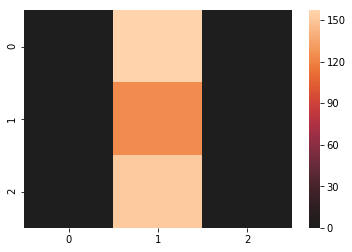

In [31]:
# Plot the previously calculated confusion matrix as a heatmap
sns.heatmap(cm_sum, center=True)
plt.show()

In [32]:
# Calculate accuracy for the mean-implementation
accuracy_score(y_test_mean, y_pred_mean)

0.3080459770114943

In [33]:
# Calculate the confusion matrix of the mean-implementation
cm_mean = confusion_matrix(y_test_mean, y_pred_mean)
cm_mean

array([[133,   1,   0],
       [148,   0,   0],
       [152,   0,   1]])

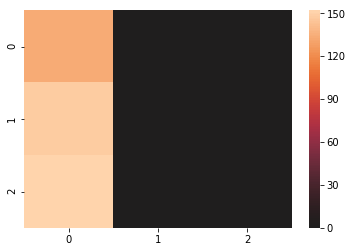

In [34]:
# Plot the previously calculated confusion matrix as a heatmap
sns.heatmap(cm_mean, center=True)
plt.show()